In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
toyota = pd.read_csv("toyota.csv")
toyota.shape

(6738, 9)

In [6]:
toyota.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


### Показатели набора

model - модель (номинальный)</br>
year - год регистрации (интервальный)</br>
price - цена в фунтах (абсолютный)</br>
transmission - тип коробки передач (номинальный)</br>
mileage - километраж (абсолютный)</br>
fuelType - тип топлива (номинальный)</br>
tax - дорожный налог (абсолютный)</br>
mpg - мили на галлон топлива (абсолютный)</br>
engineSize - объем двигателя (порядковый)</br>

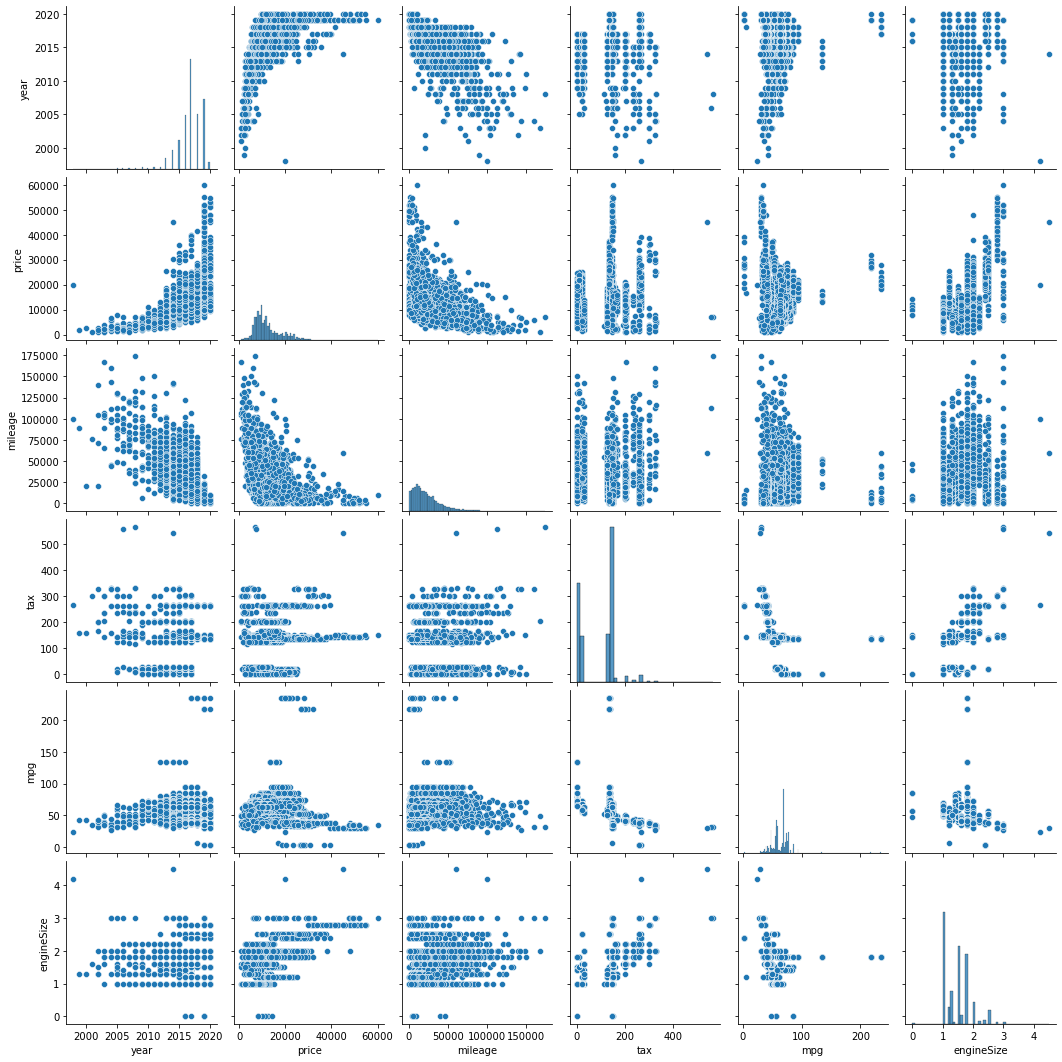

In [28]:
sns.pairplot(toyota)

<AxesSubplot:>

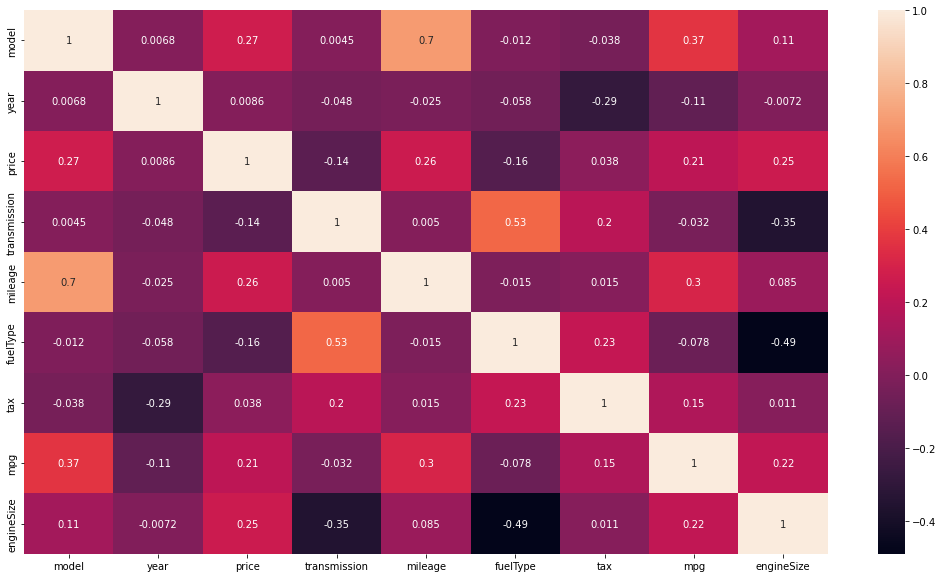

In [32]:
# Коэффициенты корреляции
plt.figure(figsize = (18, 10))
toyota_factorize = toyota.apply(lambda x : pd.factorize(x)[0]).corr(method='kendall')
sns.heatmap(toyota_factorize, annot = True)

<AxesSubplot:>

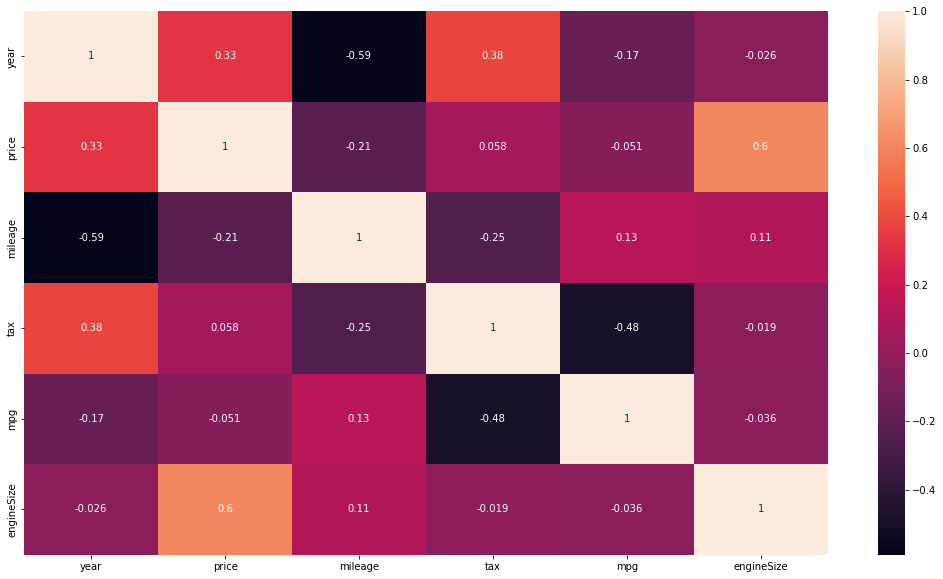

In [33]:
plt.figure(figsize = (18, 10))
sns.heatmap(toyota.corr(method = 'kendall'), annot = True)

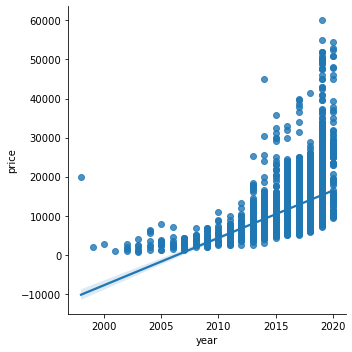

In [13]:
sns.lmplot(x = "year", y = "price", data = toyota)

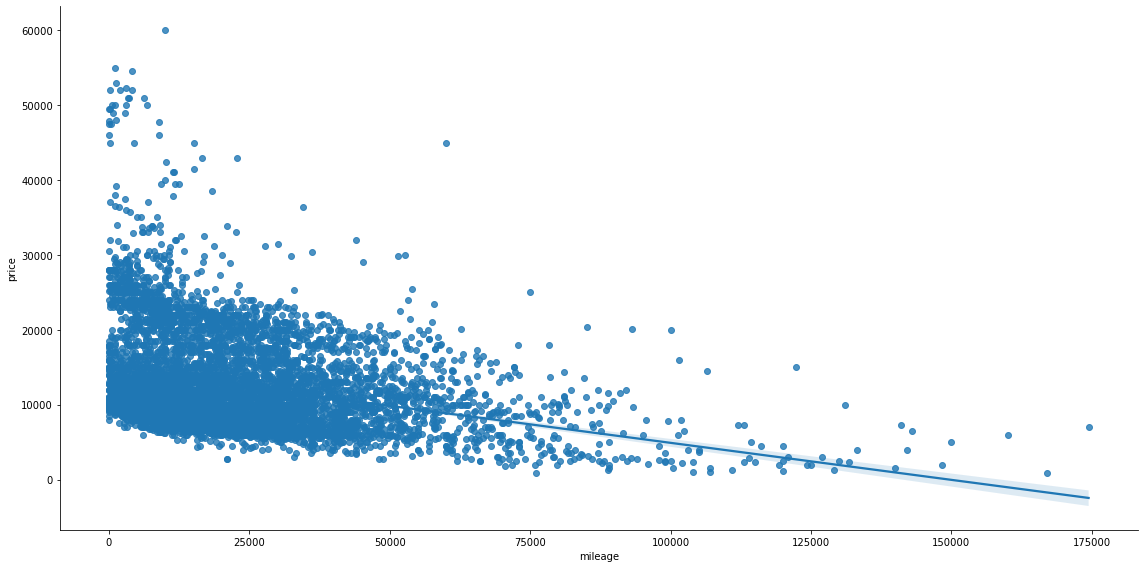

In [50]:
sns.lmplot(x = "mileage", y = "price", data = toyota, height=8, aspect=2)

<AxesSubplot:xlabel='engineSize', ylabel='price'>

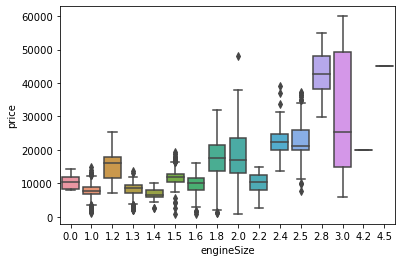

In [51]:
sns.boxplot(x = "engineSize", y = "price", data = toyota)

<AxesSubplot:xlabel='model', ylabel='price'>

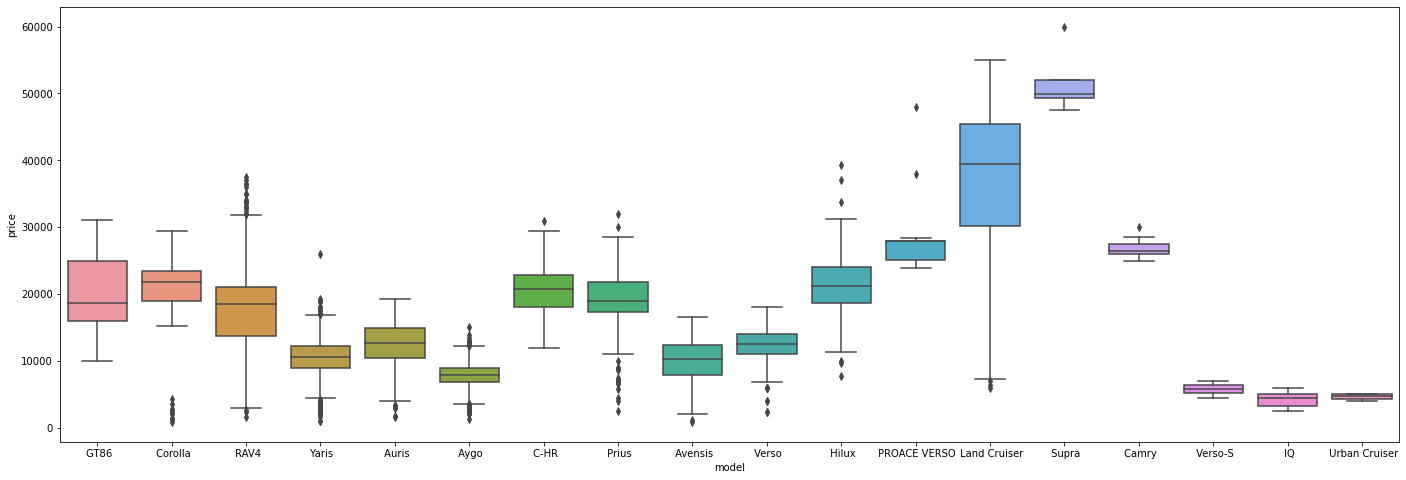

In [52]:
plt.figure(figsize = (24, 8))
sns.boxplot(x = "model", y = "price", data = toyota)

### Подготовка обучающей и тестовой выборки

In [54]:
from sklearn.model_selection import train_test_split

X = toyota.drop("price", axis=1)
Y = toyota.price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print("Размер обучающей выборки X: ", X_train.shape)
print("Размер обучающей выборки Y: ", Y_train.shape)
print("Размер тестовой выборки X: ", X_test.shape)
print("Размер тестовой выборки Y: ", Y_test.shape)


Размер обучающей выборки X:  (4716, 8)
Размер обучающей выборки Y:  (4716,)
Размер тестовой выборки X:  (2022, 8)
Размер тестовой выборки Y:  (2022,)


### Построение регрессионных моделей

In [55]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV